In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm
from scipy.stats import beta


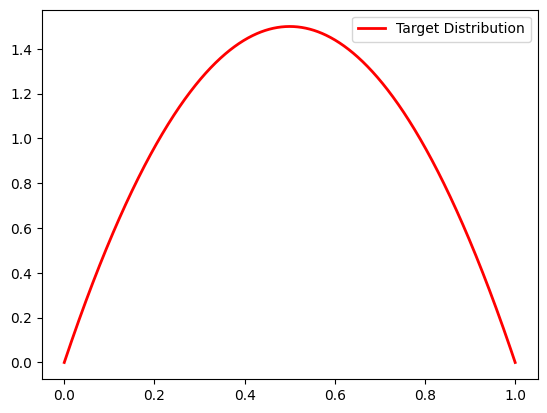

In [82]:
# def target_distribution(x):
#     return np.exp(-np.sin(100 * x)/x)

def target_distribution(x):
    return beta.pdf(x, 2, 2)

x_values = np.linspace(0, 1, 1000)

plt.plot(x_values, target_distribution(x_values), label='Target Distribution', linewidth=2, color='red')
plt.legend()
plt.show()

In [83]:

mu0 = 0.5
tau0 = 0.12

y0 = np.random.uniform(0, 1)

n = 1000000

x = []
x.append(y0)

acceptance_num = 0
 
for t in range(1, n):
    y = np.random.normal(mu0,tau0)
    q_y_given_x = norm.pdf(y, mu0, tau0) ###  normal.density(y|mu0, tau0)
    q_x_given_y = norm.pdf(x[t-1], mu0, tau0) ### normal.density(x|mu0, tau0)
    u = np.random.uniform(0,1)
    logu = np.log(u)
    logalpha = min(0,np.log(target_distribution(y))+np.log((q_x_given_y))-np.log(target_distribution(x[t-1]))-np.log(q_y_given_x))
    #logalpha = np.log(alpha)
    #logalpha = min(-(np.sin((100*y)/y)) + np.sin((100*x[t-1])/x[t-1]) - ((y-mu0)**2/2*tau0**2) + ((x[t-1]-mu0)**2/2*tau0**2) ,0) 
    # print(logalpha)
    #alpha = min(1, target_distribution(y) * q_x_given_y/target_distribution(x[t]) * q_y_given_x)

    if logu <= logalpha :
        #  x[t] = y
         x.append(y)
         acceptance_num += 1
    else: 
        x.append(x[t-1])



acceptance_rate = acceptance_num / n

# samples.append(current_sample)

print(acceptance_num)
print(acceptance_rate)

/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_32746/2338511703.py:19: RuntimeWarning: divide by zero encountered in log
  logalpha = min(0,np.log(target_distribution(y))+np.log((q_x_given_y))-np.log(target_distribution(x[t-1]))-np.log(q_y_given_x))


553032
0.553032


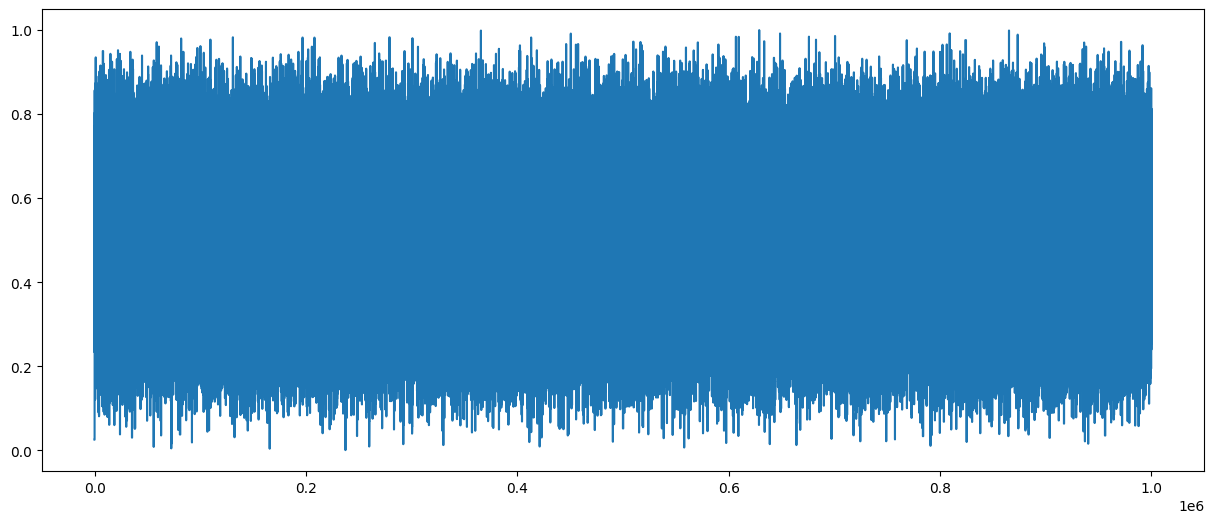

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(x)
plt.show()



/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_32746/241825662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=x, hist=False)


<Axes: ylabel='Density'>

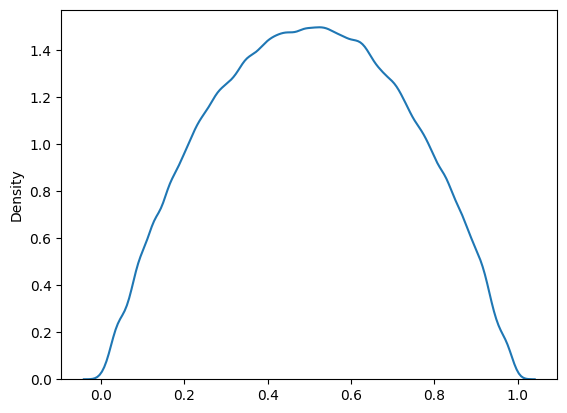

In [91]:
sns.distplot(a=x, hist=False)

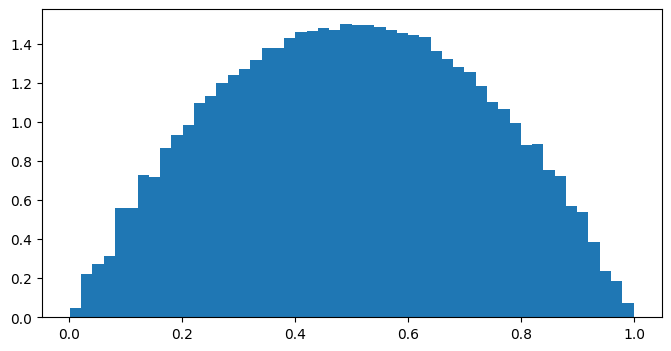

In [88]:
plt.figure(figsize=(8, 4))
plt.hist(x, bins=50,density=True)
plt.show()

In [92]:
plot_acf(np.array(x), lags = 20)
plt.show()